In [1]:
#Dependancies

import pandas as pd
import hvplot.pandas
import re
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from plotly.subplots import make_subplots

# Basic setup code.

In [3]:
# Reading csv into a DF
airfare = pd.read_csv("Consumer_Airfare_Report__Table_1a_-_All_U.S._Airport_Pair_Markets_20240712.csv", low_memory=False)

In [4]:
# Checking DF structure and details

airfare




,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE


In [5]:
airfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [6]:
# Testing creation of hashmap for latitude and longitude extraction and replacement



# lat_long_map = airfare.loc[airfare["Geocoded_City1"].isna() == False][['airportid_1','Geocoded_City1']]
# lat_long_map.drop_duplicates(inplace=True)
# lat_long_map.set_index("airportid_1", inplace=True)
# lat_long_map
# # ["Geocoded_City1
# # airfare["Geocoded_City1"].isna().sum()

In [7]:
columns = airfare.columns
columns

Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'tbl1apk'],
      dtype='object')

In [8]:
airfare[airfare["city1"]=="New York City, NY (Metropolitan Area)"]["airport_1"].value_counts()

airport_1
LGA    3951
JFK    3886
EWR    3877
ISP    3734
HPN    3729
SWF    3424
NYC     540
TSS      30
JRB       4
Name: count, dtype: int64

In [9]:
airfare_2k1_4_count = airfare.groupby(["Year","quarter"]).count().loc[[2001,2002,2003,2004]]

# .loc[[2001, 2004]].reset_index()
# airfare_2001.hvplot.line(y="tbl")

In [10]:
airfare_2k1_4_count

tbl  citymarketid_1  citymarketid_2  city1  city2  airportid_1  \
Year quarter                                                                    
2001 1        2164            2164            2164   2164   2164         2164   
     2        2217            2217            2217   2217   2217         2217   
     3        2181            2181            2181   2181   2181         2181   
     4        2086            2086            2086   2086   2086         2086   
2002 1        2127            2127            2127   2127   2127         2127   
     2        2164            2164            2164   2164   2164         2164   
     3        2175            2175            2175   2175   2175         2175   
     4        2123            2123            2123   2123   2123         2123   
2003 1        2072            2072            2072   2072   2072         2072   
     2        2138            2138            2138   2138   2138         2138   
     3        2148            2148            2148   2148   2148         2148   
     4        2130            2130            2130   2130   2130         2130   
2004 1        2083            2083            2083   2083   2083         2083   
     2        2172            2172            2172   2172   2172         2172   
     3        2157            2157            2157   2157   2157         2157   
     4        2054            2054            2054   2054   2054         2054   

              airportid_2  airport_1  airport_2  nsmiles  ...  fare  \
Year quarter                                              ...         
2001 1               2164       2164       2164     2164  ...  2164   
     2               2217       2217       2217     2217  ...  2217   
     3               2181       2181       2181     2181  ...  2181   
     4               2086       2086       2086     2086  ...  2086   
2002 1               2127       2127       2127     2127  ...  2127   
     2               2164       2164       2164     2164  ...  2164   
     3               2175       2175       2175     2175  ...  2175   
     4               2123       2123       2123     2123  ...  2123   
2003 1               2072       2072       2072     2072  ...  2072   
     2               2138       2138       2138     2138  ...  2138   
     3               2148       2148       2148     2148  ...  2148   
     4               2130       2130       2130     2130  ...  2130   
2004 1               2083       2083       2083     2083  ...  2083   
     2               2172       2172       2172     2172  ...  2172   
     3               2157       2157       2157     2157  ...  2157   
     4               2054       2054       2054     2054  ...  2054   

              carrier_lg  large_ms  fare_lg  carrier_low  lf_ms  fare_low  \
Year quarter                                                                
2001 1              2149      2149     2149         2149   2149      2149   
     2              2199      2199     2199         2199   2199      2199   
     3              2171      2171     2171         2171   2171      2171   
     4              2077      2077     2077         2077   2077      2077   
2002 1              2117      2117     2117         2117   2117      2117   
     2              2155      2155     2155         2155   2155      2155   
     3              2162      2162     2162         2162   2162      2162   
     4              2114      2114     2114         2114   2114      2114   
2003 1              2063      2063     2063         2063   2063      2063   
     2              2125      2125     2125         2125   2125      2125   
     3              2140      2140     2140         2140   2140      2140   
     4              2121      2121     2121         2121   2121      2121   
2004 1              2072      2072     2072         2072   2072      2072   
     2              2162      2162     2162         2162   2162      2162   
     3              2147      2147     2147  

<Axes: xlabel='Year,quarter'>

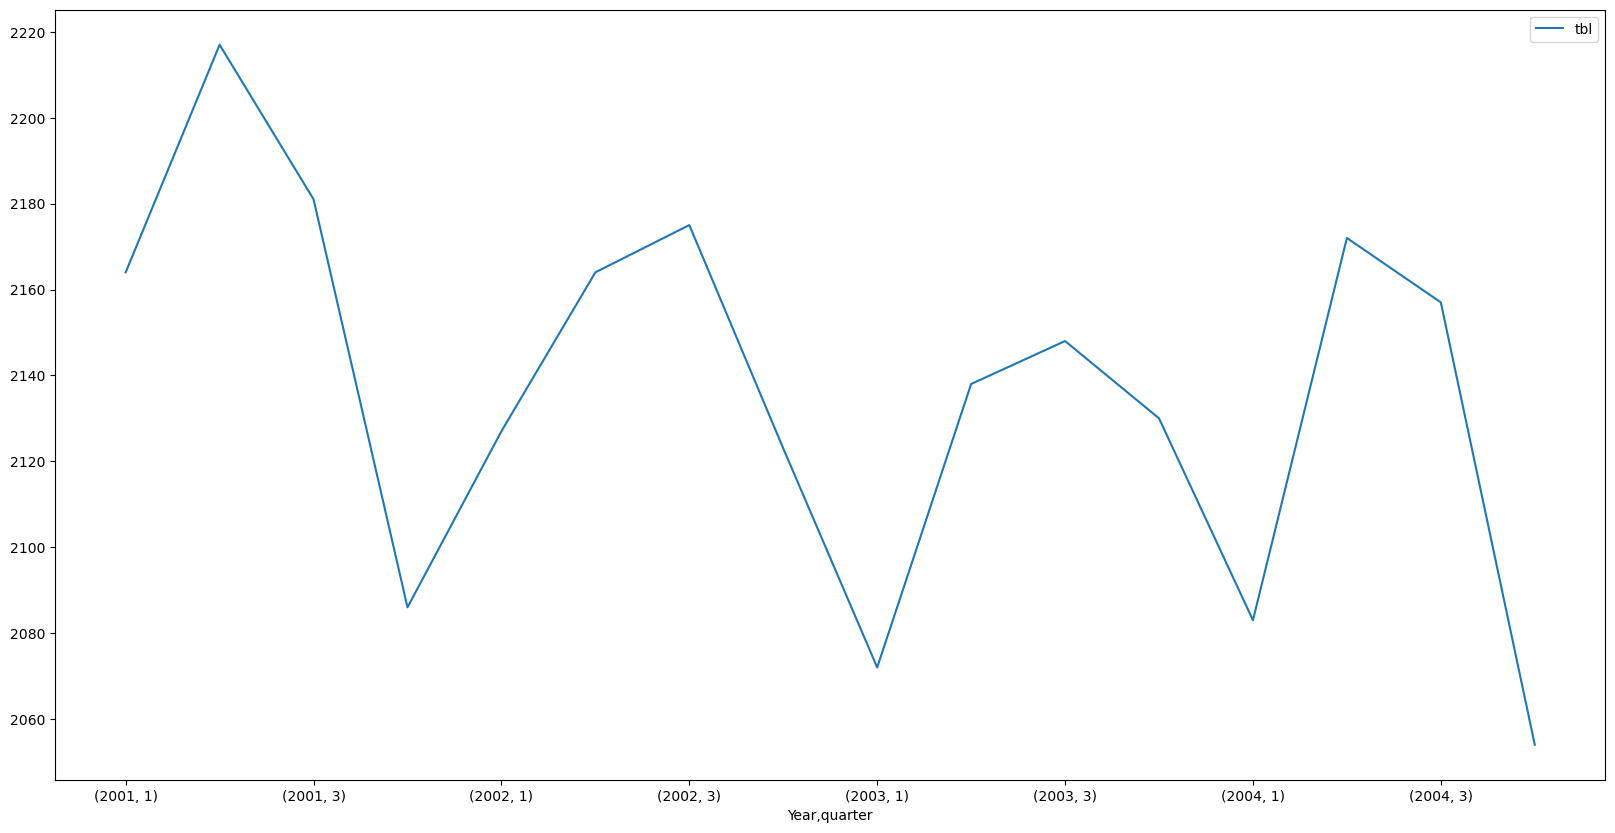

In [11]:
airfare_2k1_4_count.plot(y="tbl", figsize=(20,10))

# GEOMAPPING

### LAT-LONG DF

In [15]:
# Creating lat_long_map as a DF considering it as a hashmap for airport ID with respect to latitudes and longitudes.


lat_long_map = airfare.loc[airfare["Geocoded_City1"].isna() == False][['airportid_1','Geocoded_City1']]
lat_long_map.drop_duplicates(inplace=True)
lat_long_map.set_index("airportid_1", inplace=True)

In [16]:
# Same City, different airport IDs but same latitude and longitude

display(lat_long_map.loc[11298])
display(lat_long_map.loc[11259])

,Geocoded_City1
airportid_1,
11298,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
11298,"(40.11086, -77.035636)"


,Geocoded_City1
airportid_1,
11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
11259,"(40.11086, -77.035636)"


In [17]:
# Testing lat long extraction example.
lat_long_map.loc[15370]

,Geocoded_City1
airportid_1,
15370,"Tulsa, OK\n(61.096484, -160.967455)"
15370,"(61.096484, -160.967455)"


In [18]:
# Extract coordinates function using regular expression pattern matching.

def extract_coord(row):

    pattern = r'(?:(?:[A-Za-z\s]+,\s*[A-Z]{2})?\n?)?\(([-+]?\d*\.\d+),\s*([-+]?\d*\.\d+)\)'

    match = re.search(pattern,row)
    
    if match:
        # city = match.group(1)
        lat = float(match.group(1))
        lon = float(match.group(2))
        return lat, lon
    else:
        return None, None



In [19]:
len(lat_long_map)

317

In [20]:
# Extracting Latitude longitudes based on Geocoded_City1 into the hash map.

lat_long_map[["lat","long"]] = lat_long_map["Geocoded_City1"].apply(lambda x: pd.Series(extract_coord(x)))
lat_long_map

,Geocoded_City1,lat,long
airportid_1,,,
14869,"Salt Lake City, UT\n(40.758478, -111.888142)",40.758478,-111.888142
11109,"Colorado Springs, CO\n(38.835224, -104.819798)",38.835224,-104.819798
14122,"Pittsburgh, PA\n(40.442169, -79.994945)",40.442169,-79.994945
12889,"Las Vegas, NV\n(36.169202, -115.140597)",36.169202,-115.140597
12217,"Huntsville, AL\n(34.729538, -86.585283)",34.729538,-86.585283
...,...,...,...
14112,"(37.8606, -78.804199)",37.860600,-78.804199
14252,"(37.123874, -76.391902)",37.123874,-76.391902
14696,"(41.675032, -86.251962)",41.675032,-86.251962


In [21]:
# Reseting index before we drop duplicated airport ids.

lat_long_map.reset_index(inplace=True)

In [22]:
#view

lat_long_map

,airportid_1,Geocoded_City1,lat,long
0,14869,"Salt Lake City, UT\n(40.758478, -111.888142)",40.758478,-111.888142
1,11109,"Colorado Springs, CO\n(38.835224, -104.819798)",38.835224,-104.819798
2,14122,"Pittsburgh, PA\n(40.442169, -79.994945)",40.442169,-79.994945
3,12889,"Las Vegas, NV\n(36.169202, -115.140597)",36.169202,-115.140597
4,12217,"Huntsville, AL\n(34.729538, -86.585283)",34.729538,-86.585283
...,...,...,...,...
312,14112,"(37.8606, -78.804199)",37.860600,-78.804199
313,14252,"(37.123874, -76.391902)",37.123874,-76.391902
314,14696,"(41.675032, -86.251962)",41.675032,-86.251962
315,14783,"(39.79936, -89.643624)",39.799360,-89.643624


In [23]:
# Dropping duplicates based on airport ids.

lat_long_map.drop_duplicates(subset=['airportid_1'], inplace=True)
lat_long_map

,airportid_1,Geocoded_City1,lat,long
0,14869,"Salt Lake City, UT\n(40.758478, -111.888142)",40.758478,-111.888142
1,11109,"Colorado Springs, CO\n(38.835224, -104.819798)",38.835224,-104.819798
2,14122,"Pittsburgh, PA\n(40.442169, -79.994945)",40.442169,-79.994945
3,12889,"Las Vegas, NV\n(36.169202, -115.140597)",36.169202,-115.140597
4,12217,"Huntsville, AL\n(34.729538, -86.585283)",34.729538,-86.585283
...,...,...,...,...
304,10408,"(44.261982, -88.40724)",44.261982,-88.407240
305,10676,"(38.512629, -89.984229)",38.512629,-89.984229
308,12280,"(43.490842, -112.039087)",43.490842,-112.039087
313,14252,"(37.123874, -76.391902)",37.123874,-76.391902


In [24]:
# Setting back airport id as index

lat_long_map.set_index("airportid_1", inplace=True)
lat_long_map

,Geocoded_City1,lat,long
airportid_1,,,
14869,"Salt Lake City, UT\n(40.758478, -111.888142)",40.758478,-111.888142
11109,"Colorado Springs, CO\n(38.835224, -104.819798)",38.835224,-104.819798
14122,"Pittsburgh, PA\n(40.442169, -79.994945)",40.442169,-79.994945
12889,"Las Vegas, NV\n(36.169202, -115.140597)",36.169202,-115.140597
12217,"Huntsville, AL\n(34.729538, -86.585283)",34.729538,-86.585283
...,...,...,...
10408,"(44.261982, -88.40724)",44.261982,-88.407240
10676,"(38.512629, -89.984229)",38.512629,-89.984229
12280,"(43.490842, -112.039087)",43.490842,-112.039087


In [25]:
lat_long_map.loc[11259]

Geocoded_City1    Dallas/Fort Worth, TX\n(40.11086, -77.035636)
lat                                                    40.11086
long                                                 -77.035636
Name: 11259, dtype: object

### Complete run through for extract_coord

In [27]:
# Making dupe to prevent affecting main DF
airfare_fix_geomap = airfare

In [28]:
# More testing DF snippets

airfare_fix_geomap.loc[(airfare_fix_geomap["Geocoded_City1"].isna() == False) & (airfare_fix_geomap["city1"] == "Dallas/Fort Worth, TX")][['city1','airportid_1','Geocoded_City1']]






,city1,airportid_1,Geocoded_City1
5931,"Dallas/Fort Worth, TX",11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
5952,"Dallas/Fort Worth, TX",11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
5955,"Dallas/Fort Worth, TX",11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
5957,"Dallas/Fort Worth, TX",11298,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
5998,"Dallas/Fort Worth, TX",11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
...,...,...,...
221784,"Dallas/Fort Worth, TX",11298,"(40.11086, -77.035636)"
221785,"Dallas/Fort Worth, TX",11298,"(40.11086, -77.035636)"
221786,"Dallas/Fort Worth, TX",11298,"(40.11086, -77.035636)"
221787,"Dallas/Fort Worth, TX",11298,"(40.11086, -77.035636)"


In [29]:
display(airfare_fix_geomap['Geocoded_City1'].isna().sum())
display(airfare_fix_geomap['Geocoded_City2'].isna().sum())

39206

39206

In [30]:
# Applying hash map to airfare duplicate to check geocoded city lat long fix.

airfare_fix_geomap['Geocoded_City1'] = airfare_fix_geomap['Geocoded_City1'].fillna(
    airfare_fix_geomap['airportid_1'].map(lat_long_map['Geocoded_City1'])
)

airfare_fix_geomap['Geocoded_City2'] = airfare_fix_geomap['Geocoded_City2'].fillna(
    airfare_fix_geomap['airportid_2'].map(lat_long_map['Geocoded_City1'])
)

In [31]:
#Checking nulls


display(airfare_fix_geomap["Geocoded_City1"].isna().sum())
display(airfare_fix_geomap["Geocoded_City2"].isna().sum())
# airfare_fix_geomap.loc[(airfare_fix_geomap["Geocoded_City1"].isna() == False)].sum()

27

884

In [32]:
airfare_fix_geomap.loc[(airfare_fix_geomap["Geocoded_City2"].isna() == True)].head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
137,Table1a,2021,3,30194,32896,"Dallas/Fort Worth, TX","Lubbock, TX",11259,12896,DAL,...,144.64,WN,1.0000,144.64,WN,1.0000,144.64,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",NaN,202131125912896DALLBB
138,Table1a,2021,3,30194,32896,"Dallas/Fort Worth, TX","Lubbock, TX",11298,12896,DFW,...,159.46,AA,0.9950,159.64,AA,0.9950,159.64,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",NaN,202131129812896DFWLBB
141,Table1a,2021,3,30194,33158,"Dallas/Fort Worth, TX","Midland/Odessa, TX",11259,13158,DAL,...,153.29,WN,0.9964,153.41,WN,0.9964,153.41,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",NaN,202131125913158DALMAF
142,Table1a,2021,3,30194,33158,"Dallas/Fort Worth, TX","Midland/Odessa, TX",11298,13158,DFW,...,175.23,AA,0.9792,174.90,AA,0.9792,174.90,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",NaN,202131129813158DFWMAF
166,Table1a,2021,3,30194,34027,"Dallas/Fort Worth, TX","West Palm Beach/Palm Beach, FL",11259,14027,DAL,...,260.03,DL,0.5909,272.26,WN,0.4091,242.37,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",NaN,202131125914027DALPBI


In [33]:
airfare_fix_geomap.dropna(subset=["Geocoded_City1", "Geocoded_City2"], how='any',inplace=True)
airfare_fix_geomap[['Geocoded_City1','Geocoded_City2']].isna().sum()

Geocoded_City1    0
Geocoded_City2    0
dtype: int64

### Getting separate dfs for latitude and longitudes pre-mapping

In [35]:
# Setting latitude longitude DFs for mapping in future.

geocoded_city1 = airfare_fix_geomap[["Year","quarter","airportid_1","Geocoded_City1"]]
geocoded_city2 = airfare_fix_geomap[["Year","quarter","airportid_2","Geocoded_City2"]]

In [36]:
display(geocoded_city1.head())
display(geocoded_city2.head())

,Year,quarter,airportid_1,Geocoded_City1
0,2021,3,10135,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7..."
1,2021,3,10135,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7..."
2,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)"
3,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)"
4,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)"


,Year,quarter,airportid_2,Geocoded_City2
0,2021,3,14112,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8..."
1,2021,3,15304,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8..."
2,2021,3,11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
3,2021,3,11298,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
4,2021,3,14107,"Phoenix, AZ\n(30.406931, -87.217578)"


In [37]:
# Checking nulls to be fixed using lat_long_map DF.
display(geocoded_city1.isna().sum())
display(geocoded_city2.isna().sum())

Year              0
quarter           0
airportid_1       0
Geocoded_City1    0
dtype: int64

Year              0
quarter           0
airportid_2       0
Geocoded_City2    0
dtype: int64

In [38]:
# Checking length consistancies.

display(len(geocoded_city1))
display(len(geocoded_city2))

245044

245044

In [39]:
# Extract all final latitudes and longitudes before mapping

# geocoded_city1['state'] = airfare["Geocoded_City1"].apply(extract_state)
# geocoded_city2['state'] = airfare["Geocoded_City2"].apply(extract_state)

In [40]:
geocoded_city1[["lat","long"]] = geocoded_city1["Geocoded_City1"].apply(lambda x: pd.Series(extract_coord(x)))
geocoded_city2[["lat","long"]] = geocoded_city2["Geocoded_City2"].apply(lambda x: pd.Series(extract_coord(x)))

/var/folders/h4/xm09cdqx717237dwyz2xxbbw0000gn/T/ipykernel_8254/3050531088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geocoded_city1[["lat","long"]] = geocoded_city1["Geocoded_City1"].apply(lambda x: pd.Series(extract_coord(x)))
/var/folders/h4/xm09cdqx717237dwyz2xxbbw0000gn/T/ipykernel_8254/3050531088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geocoded_city1[["lat","long"]] = geocoded_city1["Geocoded_City1"].apply(lambda x: pd.Series(extract_coord(x)))
/var/folders/h4/xm09cdqx717237dwyz2x

In [41]:
display(geocoded_city1)
display(geocoded_city2)

,Year,quarter,airportid_1,Geocoded_City1,lat,long
0,2021,3,10135,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7...",40.602753,-75.469759
1,2021,3,10135,"Allentown/Bethlehem/Easton, PA\n(40.602753, -7...",40.602753,-75.469759
2,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)",35.084248,-106.649241
3,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)",35.084248,-106.649241
4,2021,3,10140,"Albuquerque, NM\n(35.084248, -106.649241)",35.084248,-106.649241
...,...,...,...,...,...,...
245950,2024,1,15412,"Knoxville, TN\n(35.962631, -83.916677)",35.962631,-83.916677
245951,2024,1,15412,"Knoxville, TN\n(35.962631, -83.916677)",35.962631,-83.916677
245952,2024,1,15412,"Knoxville, TN\n(35.962631, -83.916677)",35.962631,-83.916677
245953,2024,1,15412,"Knoxville, TN\n(35.962631, -83.916677)",35.962631,-83.916677


,Year,quarter,airportid_2,Geocoded_City2,lat,long
0,2021,3,14112,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",37.860600,-78.804199
1,2021,3,15304,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",37.860600,-78.804199
2,2021,3,11259,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",40.110860,-77.035636
3,2021,3,11298,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)",40.110860,-77.035636
4,2021,3,14107,"Phoenix, AZ\n(30.406931, -87.217578)",30.406931,-87.217578
...,...,...,...,...,...,...
245950,2024,1,12953,"New York City, NY (Metropolitan Area)\n(40.123...",40.123164,-75.333718
245951,2024,1,11697,"Miami, FL (Metropolitan Area)\n(44.977479, -93...",44.977479,-93.264346
245952,2024,1,13303,"Miami, FL (Metropolitan Area)\n(44.977479, -93...",44.977479,-93.264346
245953,2024,1,14112,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",37.860600,-78.804199


### COLOR GRADIENT and MAPPING

In [43]:
# Creating frequency list for departure aports in 2001

airportid_1_freq_2k1 = geocoded_city1.loc[geocoded_city1["Year"]==2001][['airportid_1']].value_counts()

In [44]:
# Creating frequency list for arrival aports in 2001

airportid_2_freq_2k1 = geocoded_city2.loc[geocoded_city1["Year"]==2001][['airportid_2']].value_counts().to_list()
airportid_2_freq_2k2 = geocoded_city2.loc[geocoded_city1["Year"]==2002][['airportid_2']].value_counts().to_list()
airportid_2_freq_2k3 = geocoded_city2.loc[geocoded_city1["Year"]==2003][['airportid_2']].value_counts().to_list()
airportid_2_freq_2k4 = geocoded_city2.loc[geocoded_city1["Year"]==2004][['airportid_2']].value_counts().to_list()

# airportid_2_freq_2k1[0:10]

In [45]:
# Getting lenght to create color gradient.

display(len(airportid_1_freq_2k1))
display(len(airportid_2_freq_2k1))

118

106

In [46]:
# Filter the dataframes between the years 2001 and 2004 for accurate understanding of the impact, if any of 9/11.

filtered_df1 = geocoded_city1[(geocoded_city1['Year'] >= 2001) & (geocoded_city1['Year'] <= 2004)]
filtered_df2 = geocoded_city2[(geocoded_city2['Year'] >= 2001) & (geocoded_city2['Year'] <= 2004)]

In [47]:
filtered_df1

,Year,quarter,airportid_1,Geocoded_City1,lat,long
5926,2003,2,10257,"Albany, NY\n(42.651242, -73.755418)",42.651242,-73.755418
5929,2001,1,10693,"Nashville, TN\n(36.166687, -86.779932)",36.166687,-86.779932
5932,2002,1,14307,"Boston, MA (Metropolitan Area)\n(42.358894, -7...",42.358894,-71.056742
5936,2002,1,12266,"Houston, TX\n(29.760803, -95.369506)",29.760803,-95.369506
5938,2003,4,13296,"Boston, MA (Metropolitan Area)\n(42.358894, -7...",42.358894,-71.056742
...,...,...,...,...,...,...
179491,2002,2,13931,"Norfolk, VA (Metropolitan Area)\n(36.846164, -...",36.846164,-76.285913
179493,2004,1,11433,"Detroit, MI\n(42.332916, -83.047853)",42.332916,-83.047853
179504,2003,1,10397,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...",33.748547,-84.391502
179506,2003,3,11042,"Cleveland, OH (Metropolitan Area)\n(41.505546,...",41.505546,-81.691500


In [48]:
# Counting the airports to calculate frequencies.

df1_counts = filtered_df1.groupby(['Year','quarter','airportid_1', 'Geocoded_City1', 'lat', 'long']).size().reset_index(name='count')
df2_counts = filtered_df2.groupby(['Year','quarter','airportid_2', 'Geocoded_City2', 'lat', 'long']).size().reset_index(name='count')

In [49]:
# Creating the animation frames for the plotting

df1_counts['animation_frame'] = df1_counts['Year'].astype(str) + " Q" + df1_counts['quarter'].astype(str)
df2_counts['animation_frame'] = df2_counts['Year'].astype(str) + " Q" + df2_counts['quarter'].astype(str)

In [50]:
# Normalizing counts to map to color scale.

df1_counts['normalized_count'] = (df1_counts['count'] - df1_counts['count'].min()) / (df1_counts['count'].max() - df1_counts['count'].min())
df2_counts['normalized_count'] = (df2_counts['count'] - df2_counts['count'].min()) / (df2_counts['count'].max() - df2_counts['count'].min())

In [51]:
# df1_counts.loc[df1_counts["Year"]==2001]
df1_counts

,Year,quarter,airportid_1,Geocoded_City1,lat,long,count,animation_frame,normalized_count
0,2001,1,10140,"Albuquerque, NM\n(35.084248, -106.649241)",35.084248,-106.649241,28,2001 Q1,0.341772
1,2001,1,10158,"Atlantic City, NJ\n(33.748547, -84.391502)",33.748547,-84.391502,3,2001 Q1,0.025316
2,2001,1,10257,"Albany, NY\n(42.651242, -73.755418)",42.651242,-73.755418,13,2001 Q1,0.151899
3,2001,1,10279,"Amarillo, TX\n(35.207009, -101.832013)",35.207009,-101.832013,5,2001 Q1,0.050633
4,2001,1,10372,"Aspen, CO\n(39.190665, -106.819201)",39.190665,-106.819201,6,2001 Q1,0.063291
...,...,...,...,...,...,...,...,...,...
1775,2004,4,15304,"Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",37.860600,-78.804199,4,2004 Q4,0.037975
1776,2004,4,15370,"Tulsa, OK\n(61.096484, -160.967455)",61.096484,-160.967455,3,2004 Q4,0.025316
1777,2004,4,15376,"Tucson, AZ\n(35.167852, -103.726151)",35.167852,-103.726151,3,2004 Q4,0.025316
1778,2004,4,15412,"Knoxville, TN\n(35.962631, -83.916677)",35.962631,-83.916677,9,2004 Q4,0.101266


In [139]:
#Plot departure data

fig1 = px.scatter_geo(df1_counts,
                      lat='lat',
                      lon='long',
                      color='normalized_count',
                      color_continuous_scale='RdYlGn_r',
                      scope='usa',
                      animation_frame='animation_frame',
                      category_orders={'animation_frame': sorted(df1_counts['animation_frame'].unique())}
                     )


In [142]:
# Plot arrival data

fig2 = px.scatter_geo(df2_counts,
                      lat='lat',
                      lon='long',
                      color='normalized_count',
                      color_continuous_scale='RdYlGn_r',
                      scope='usa',
                      animation_frame='animation_frame',
                      category_orders={'animation_frame': sorted(df2_counts['animation_frame'].unique())}
                     )

In [152]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Airport Departures', 'Airport Arrivals'), specs=[[{'type': 'scattergeo'}, {'type': 'scattergeo'}]])

In [154]:
# Setting up frames for animation
frames = []

for frame in sorted(df1_counts['animation_frame'].unique()):
    df1_frame = df1_counts[df1_counts['animation_frame'] == frame]
    df2_frame = df2_counts[df2_counts['animation_frame'] == frame]

    frames.append({
        'name': frame,
        'data': [
            px.scatter_geo(df1_frame, lat='lat', lon='long', color='normalized_count', hover_name='Geocoded_City1',
                           color_continuous_scale='RdYlGn_r', scope='usa').data[0],
            px.scatter_geo(df2_frame, lat='lat', lon='long', color='normalized_count', hover_name='Geocoded_City2',
                           color_continuous_scale='RdYlGn_r', scope='usa').data[0]
        ]
    })

In [158]:
# Adding the first frame's data to the subplots
first_frame_df1 = df1_counts[df1_counts['animation_frame'] == sorted(df1_counts['animation_frame'].unique())[0]]
first_frame_df2 = df2_counts[df2_counts['animation_frame'] == sorted(df2_counts['animation_frame'].unique())[0]]

fig.add_trace(
    px.scatter_geo(first_frame_df1, lat='lat', lon='long', color='normalized_count', hover_name='Geocoded_City1',
                   color_continuous_scale='RdYlGn_r', scope='usa').data[0],
    row=1, col=1
);

fig.add_trace(
    px.scatter_geo(first_frame_df2, lat='lat', lon='long', color='normalized_count', hover_name='Geocoded_City2',
                   color_continuous_scale='RdYlGn_r', scope='usa').data[0],
    row=1, col=2
);

In [162]:
# Fixing the borders:

fig.update_layout(
    geo=dict(
        scope='usa',
        showcountries=True, countrycolor="black",
        showsubunits=True, subunitcolor="black"
    ),
    geo2=dict(
        scope='usa',
        showcountries=True, countrycolor="black",
        showsubunits=True, subunitcolor="black"
    ),
    coloraxis=dict(
        colorbar=dict(
            title="Airport Counts"
        )
    ),
    width=1200,  # Adjust the width and height as needed
    height=600,
    title_text="Time Period 2001-2004",
    sliders=[{
        'pad': {'b': 10, 't': 50},
        'currentvalue': {
            'visible': True,
            'prefix': '',
            'font': {'size': 20, 'color': 'black'},
            'xanchor': 'center'
        },
        'len': 0.9,
        'x': 0.1,
        'y': 0,
        'steps': [{
            'label': frame,
            'method': 'animate',
            'args': [[frame], {'mode': 'immediate', 'frame': {'duration': 500, 'redraw': True},
                               'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}]
        } for frame in sorted(df1_counts['animation_frame'].unique())]
    }],
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': True},
                                'fromcurrent': True,
                                'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False},
                                  'mode': 'immediate',
                                  'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
);

In [164]:
# frames = []
# for frame in sorted(df1_counts['animation_frame'].unique()):
#     frames.append({
#         'name': frame,
#         'data': [
#             px.scatter_geo(df1_counts[df1_counts['animation_frame'] == frame], lat='lat', lon='long', color='normalized_count', color_continuous_scale='RdYlGn_r', scope='usa').data[0],
#             px.scatter_geo(df2_counts[df2_counts['animation_frame'] == frame], lat='lat', lon='long', color='normalized_count', color_continuous_scale='RdYlGn_r', scope='usa').data[0]
#         ]
#     })

fig.frames = frames


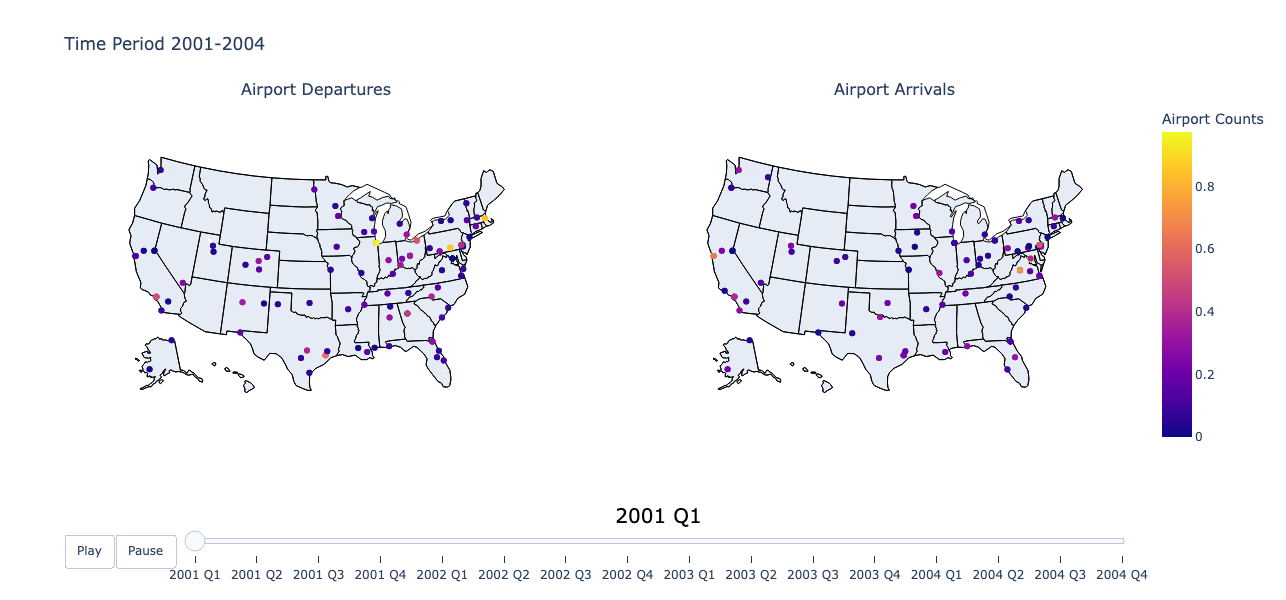

In [166]:
# Plotting the two maps
fig.show()

# BACKGROUND CODE

In [58]:
import re
def extract_state(row):
    pattern = r',\s([A-Z]{2})'
    match = re.search(pattern,row)
    return match.group(1) if match else ""


airfare['state1'] = airfare['city1'].apply(extract_state)
airfare['state2'] = airfare['city2'].apply(extract_state)

In [59]:
airfare['state2'].isna().sum()

0